<a href="https://www.kaggle.com/code/sarathmenon097/credit-score-vs-employment-profile-relation?scriptVersionId=142232478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv


In [63]:
df = pd.read_csv('/kaggle/input/credit-profile-two-wheeler-loan-dataset/credit_data.csv')

In [64]:
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [65]:
df.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [66]:
df.shape

(279856, 15)

<Axes: xlabel='Employment Profile'>

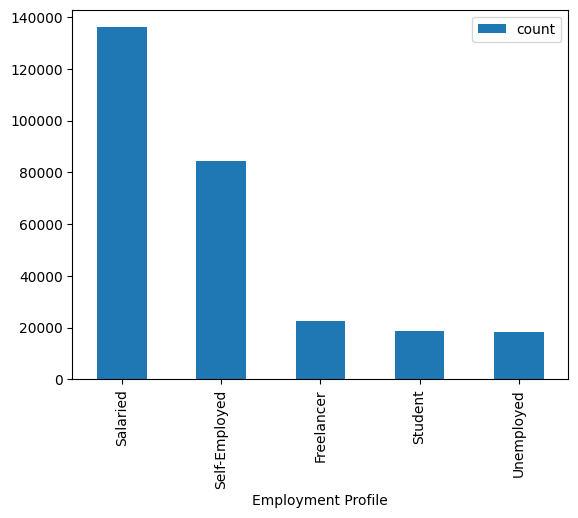

In [67]:
df['Employment Profile'].value_counts().plot(kind='bar', legend=True)

### As loan approval is ideal if credit score is greater than 750, in between 685 to 750 it is not ideal and below 685, loan approval is very tough.

In [84]:
bins = [300, 500, 649, 650, 750, 900]
label = ['Very Poor','Poor', 'Average', 'Good', 'Excellent']

In [70]:
df['Credit Score'].min()

300

In [71]:
df['Credit Score'].max()

850

In [85]:
df['Credit Score'] = pd.cut(x = df['Credit Score'], bins = bins, labels = label)

In [86]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,Poor,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,Very Poor,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,Excellent,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,Good,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,Poor,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,Very Poor,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,Excellent,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,Poor,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,NaN
279854,67,Male,191000,Very Poor,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


In [130]:
credit_score_value = df['Credit Score'].value_counts().to_frame()

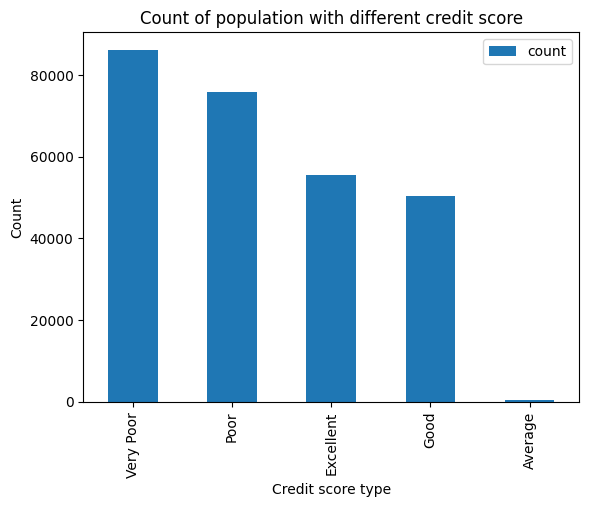

In [134]:
credit_score_value.plot(kind = 'bar')
plt.title('Count of population with different credit score')
plt.xlabel('Credit score type')
plt.ylabel('Count')
plt.show()

#### From the above series, we can see that most of the people have a very poor/ poor credit score (1,62,021) and only a mere 20% of the total population an excellent credit score

In [120]:
df1 = df.groupby('Credit Score')['Employment Profile'].value_counts().to_frame()

In [140]:
df1

count
Credit Score Employment Profile       
Very Poor    Salaried            39939
             Self-Employed       26128
             Freelancer           7424
             Unemployed           6368
             Student              6281
Poor         Salaried            36780
             Self-Employed       22821
             Freelancer           6226
             Student              5073
             Unemployed           4981
Average      Salaried              319
             Self-Employed         150
             Freelancer             39
             Unemployed             33
             Student                27
Good         Salaried            24461
             Self-Employed       15250
             Freelancer           4064
             Student              3519
             Unemployed           3151
Excellent    Salaried            30141
             Self-Employed       16462
             Freelancer           3704
             Unemployed           2641
             Student              2511

Text(0, 0.5, 'Count')

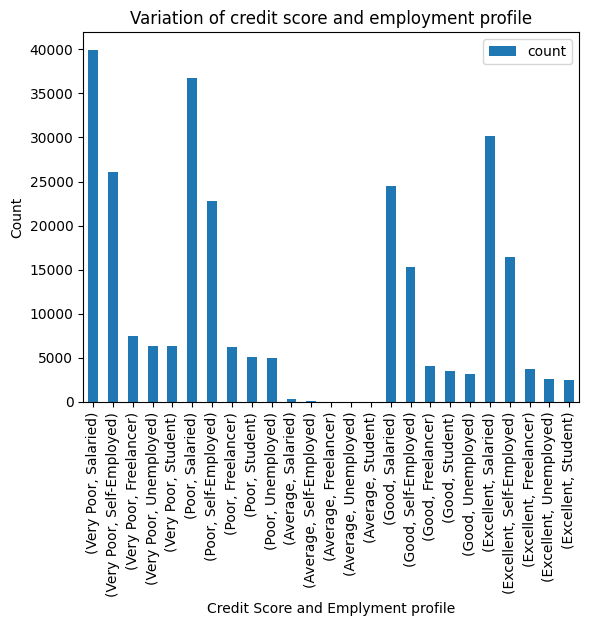

In [139]:
df1.plot(kind = 'bar')
plt.title('Variation of credit score and employment profile')
plt.xlabel('Credit Score and Emplyment profile')
plt.ylabel('Count')